In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
cc_df=pd.read_csv("C:/Users/hp/Desktop/udemy/data science/marketing/2. Marketing Department/Marketing_data.csv")

In [6]:
cc_df.shape

(8950, 18)

In [7]:
cc_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [11]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [12]:
cc_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [13]:
# Mean balance is $1564 
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

In [16]:
# customer who made one off purchase of $40761!
cc_df[cc_df['ONEOFF_PURCHASES']==40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [17]:
cc_df['CASH_ADVANCE'].max()

47137.211760000006

In [18]:
cc_df[cc_df['CASH_ADVANCE']==47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


**VISUALIZING THE DATA**

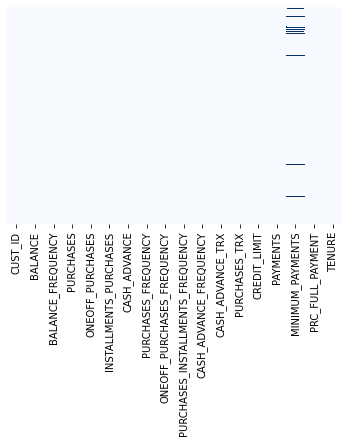

In [21]:
# Checking if we have any missing data

sns.heatmap(cc_df.isnull(), yticklabels=False,cbar=False,cmap='Blues')


In [22]:
cc_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [23]:
# Filling up the missing elements with mean of the 'MINIMUM_PAYMENT' 

cc_df.loc[(cc_df['MINIMUM_PAYMENTS'].isnull()==True), 'MINIMUM_PAYMENTS']=cc_df['MINIMUM_PAYMENTS'].mean()

In [24]:
cc_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [25]:
# Filling up the missing elements with mean of the 'CREDIT_LIMIT' 

cc_df.loc[(cc_df['CREDIT_LIMIT'].isnull()==True), 'CREDIT_LIMIT']=cc_df['CREDIT_LIMIT'].mean()

In [26]:
cc_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

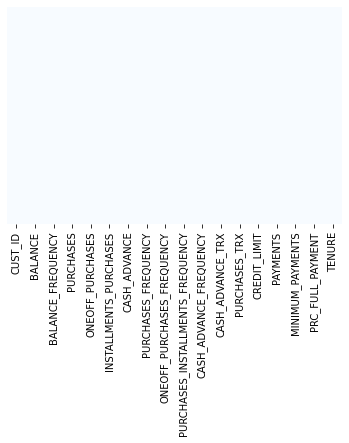

In [27]:
sns.heatmap(cc_df.isnull(), yticklabels=False,cbar=False,cmap='Blues')


In [28]:
#checking for duplicate entries

cc_df.duplicated().sum()

0

In [31]:
#dropping customer id since it has no meaning here

cc_df.drop('CUST_ID',axis = 1,inplace=True)

In [32]:
cc_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [33]:
n=len(cc_df.columns)
n

17

In [34]:
cc_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [39]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate


D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


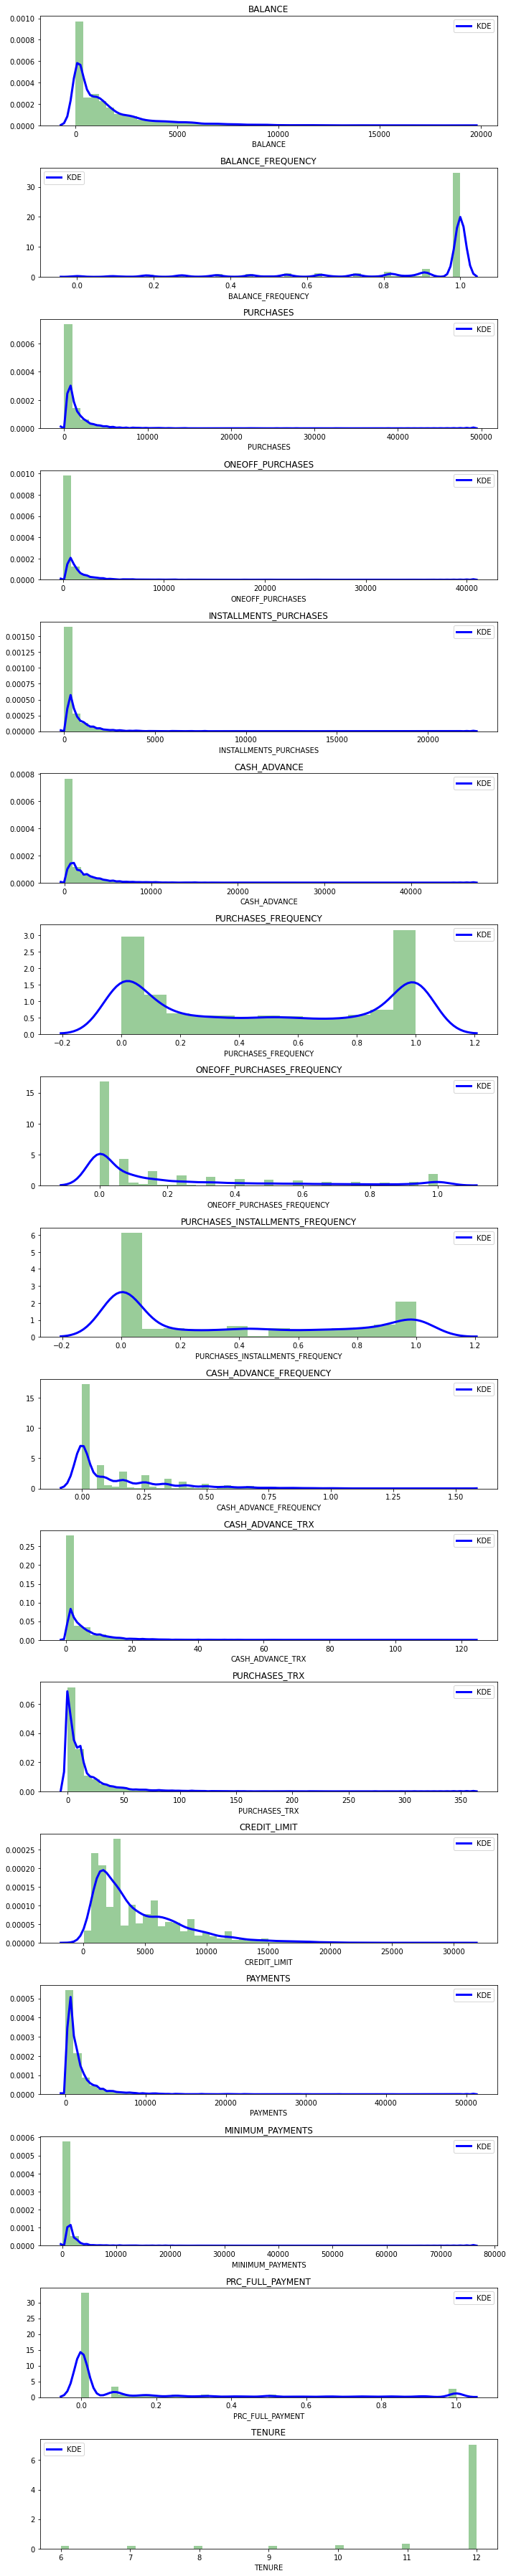

In [37]:
plt.figure(figsize=(10,50))
for i in range(len(cc_df.columns)):
    plt.subplot(17,1,i+1)
    sns.distplot(cc_df[cc_df.columns[i]],kde_kws={'color':'b','lw':3,'label':'KDE',},hist_kws={'color':'g'})
    plt.title(cc_df.columns[i])

plt.tight_layout()

In [41]:
                     #KEY TAKEAWAYS

# Mean of balance ~ $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

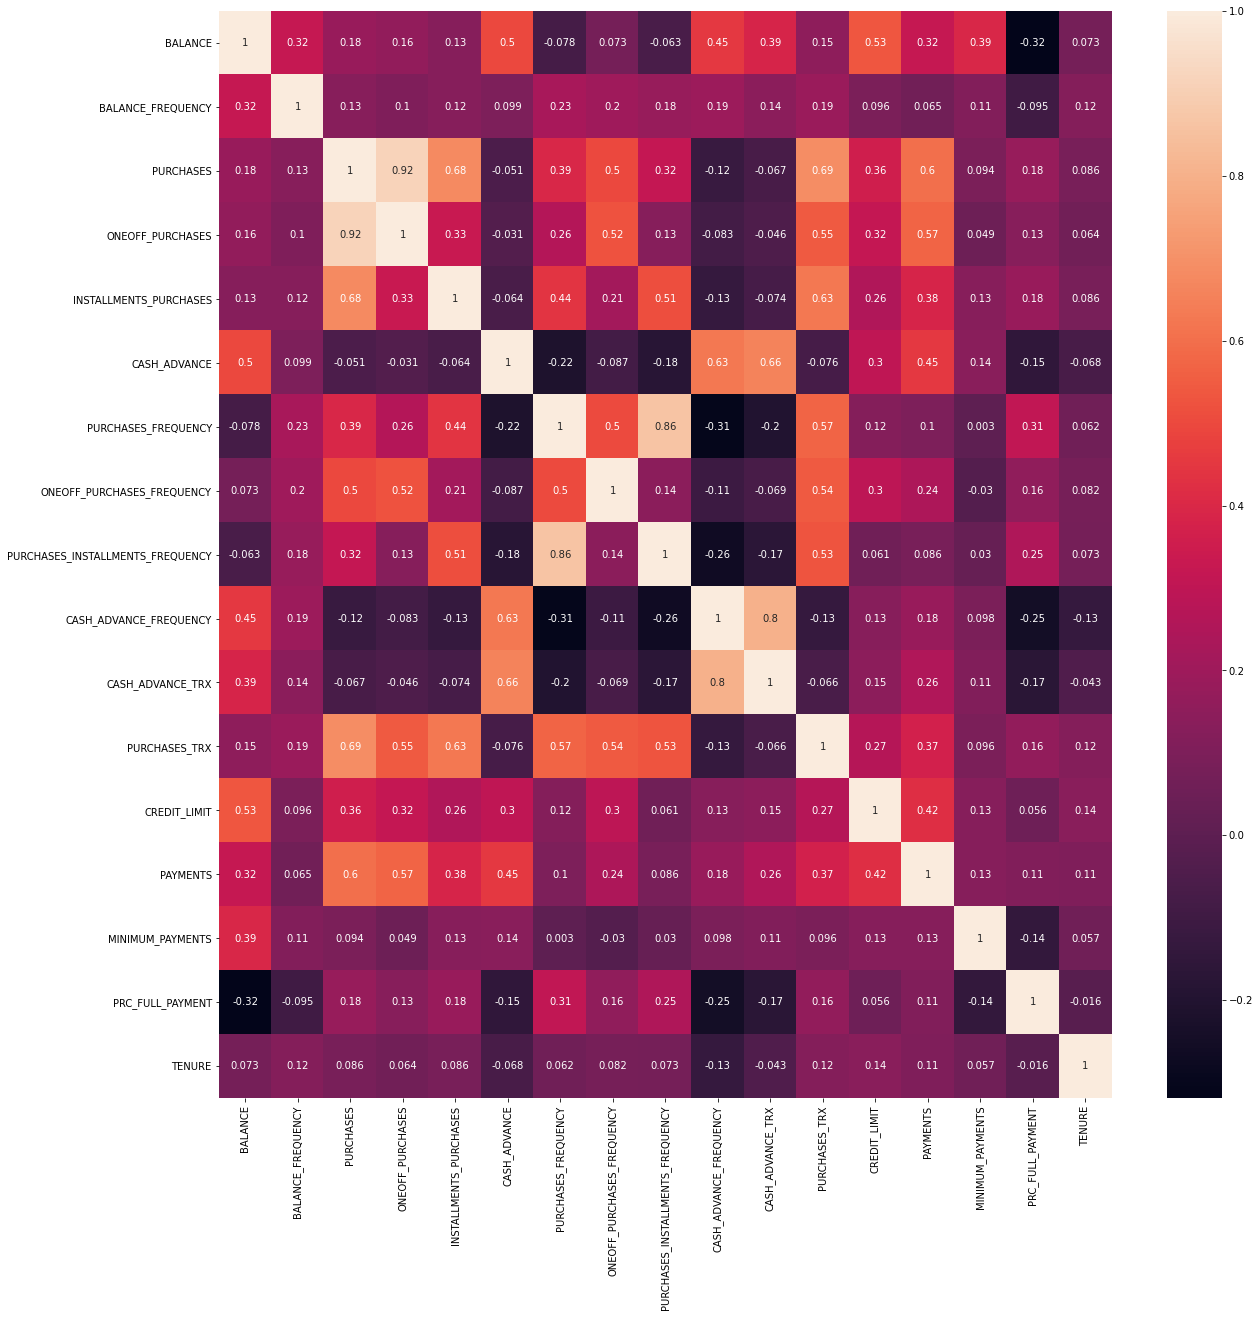

In [43]:
correlations= cc_df.corr()

f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(correlations,annot=True)

In [ ]:
# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'

In [44]:
# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'


**FINDING OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD**

In [45]:
#SCALING THE DATA

scaler=StandardScaler()
cc_df_scaled=scaler.fit_transform(cc_df)

In [46]:
cc_df_scaled.shape

(8950, 17)

In [47]:
cc_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [56]:
scores_1=[]
range_values=range(1,20)

for i in range_values:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(cc_df_scaled)
    scores_1.append(kmeans.inertia_)

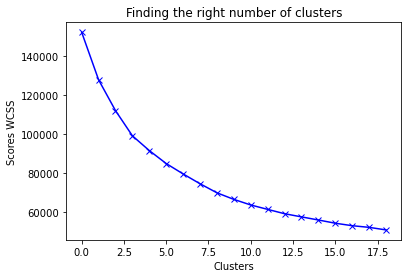

In [60]:
plt.plot(scores_1,'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')
plt.show()

**APLYING  K-MEANS  ALGORITHM**

In [80]:
kmeans=KMeans(8)
kmeans.fit(cc_df_scaled)
labels=kmeans.labels_

In [81]:
labels

array([0, 4, 3, ..., 5, 0, 3])

In [82]:
kmeans.cluster_centers_.shape

(8, 17)

In [83]:
cluster_centers=pd.DataFrame(data=kmeans.cluster_centers_,columns=[cc_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.010066,0.368428,-0.365553,-0.249221,-0.406398,-0.069837,-0.882886,-0.416567,-0.771482,0.154564,-0.015310,-0.494219,-0.342444,-0.267811,-0.072308,-0.455448,-0.015534
1,1.109761,0.468337,-0.123906,-0.295655,0.249587,-0.034556,-0.096203,-0.557801,0.140950,-0.143235,-0.039176,0.037750,-0.105359,-0.119854,9.509958,-0.520275,0.291491
2,-0.698343,-2.138201,-0.318551,-0.237369,-0.317018,-0.306380,-0.566475,-0.436873,-0.459653,-0.486727,-0.359703,-0.428317,-0.214982,-0.222251,-0.255450,0.251725,-0.152326
3,-0.159843,0.382817,0.414326,0.550365,-0.031558,-0.336734,0.912641,1.815132,0.080838,-0.402131,-0.323196,0.493371,0.343484,0.060319,-0.161745,0.362757,0.177101
4,1.591129,0.374188,-0.221409,-0.156063,-0.236875,1.973455,-0.472026,-0.203445,-0.419621,1.926312,1.875887,-0.270937,0.978303,0.764417,0.350124,-0.390137,-0.090228
5,-0.397575,0.308793,-0.059025,-0.255057,0.328973,-0.361270,0.981858,-0.410228,1.178062,-0.462395,-0.357974,0.141068,-0.312364,-0.240952,-0.121922,0.363677,-0.023300
6,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
7,0.852520,0.467975,2.256868,1.786370,2.054536,-0.190864,1.163543,1.633028,1.204925,-0.302651,-0.211371,2.715236,1.241867,1.277841,0.262953,0.318491,0.333445


In [90]:
#Perfroming inverse transformation

cluster_centers=scaler.inverse_transform(cluster_centers)
cluster_centers=pd.DataFrame(data=cluster_centers,columns=[cc_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1543.524327,0.964548,222.194417,178.782155,43.566974,832.419421,0.136006,0.078188,0.057831,0.166074,3.144344,2.425399,3248.496415,957.858311,695.696271,0.020504,11.496530
1,3874.347938,0.988216,738.477778,101.711296,636.766481,906.404863,0.451740,0.036055,0.420455,0.106481,2.981481,15.648148,4111.111111,1386.179670,23026.762059,0.001543,11.907407
2,110.932490,0.370751,322.616091,198.453266,124.392546,336.377066,0.262997,0.072130,0.181760,0.037745,0.794118,4.063467,3712.255336,1089.748094,268.890714,0.227340,11.313467
3,1231.775177,0.967957,1888.418780,1505.930744,382.530424,272.723171,0.856638,0.743947,0.396564,0.054674,1.043253,26.973183,5744.186065,1907.762633,487.265697,0.259815,11.754325
4,4876.275746,0.965912,530.160911,333.405402,196.864480,5117.298912,0.300904,0.141766,0.197669,0.520619,16.050375,7.975348,8053.916983,3946.055868,1680.154663,0.039606,11.396570
5,736.956592,0.950421,877.097994,169.095236,708.554182,221.271410,0.884418,0.080079,0.832629,0.042614,0.805915,18.216266,3357.942876,1035.610646,580.073312,0.260084,11.486137
6,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
7,3338.923294,0.988130,5825.038064,3557.445854,2268.958952,578.619846,0.957336,0.689622,0.843306,0.074581,1.806378,82.200456,9012.870159,5432.368875,1477.006991,0.246868,11.963554


In [91]:
labels.shape

(8950,)

In [92]:
labels.max()

7

In [93]:
labels.min()

0

In [94]:
# concatenating the clusters labels to the original dataframe

cc_df_cluster=pd.concat([cc_df,pd.DataFrame({'cluster':labels})],axis=1)
cc_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


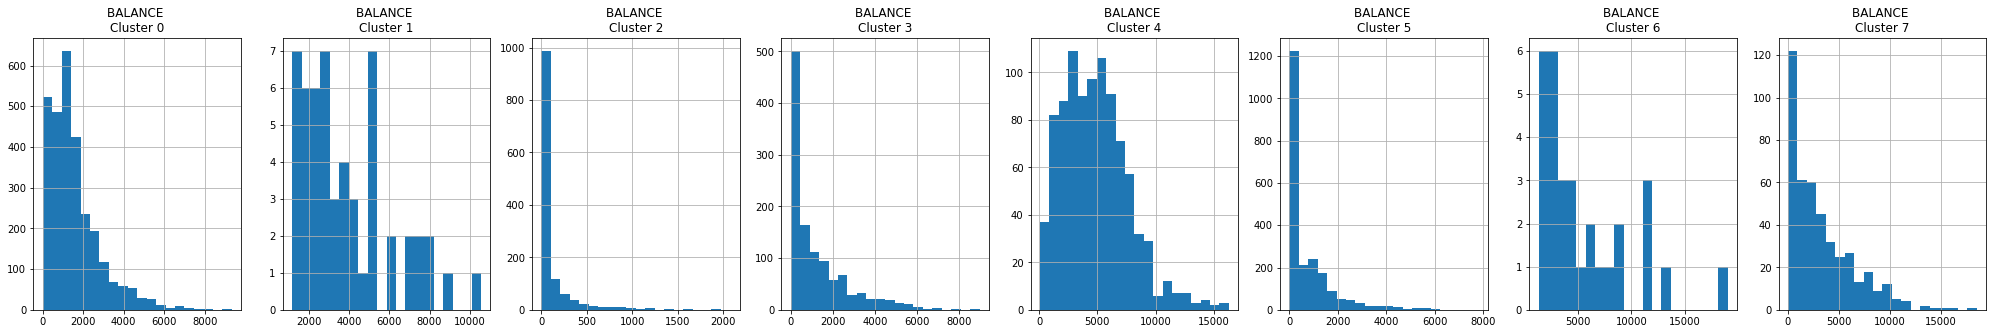

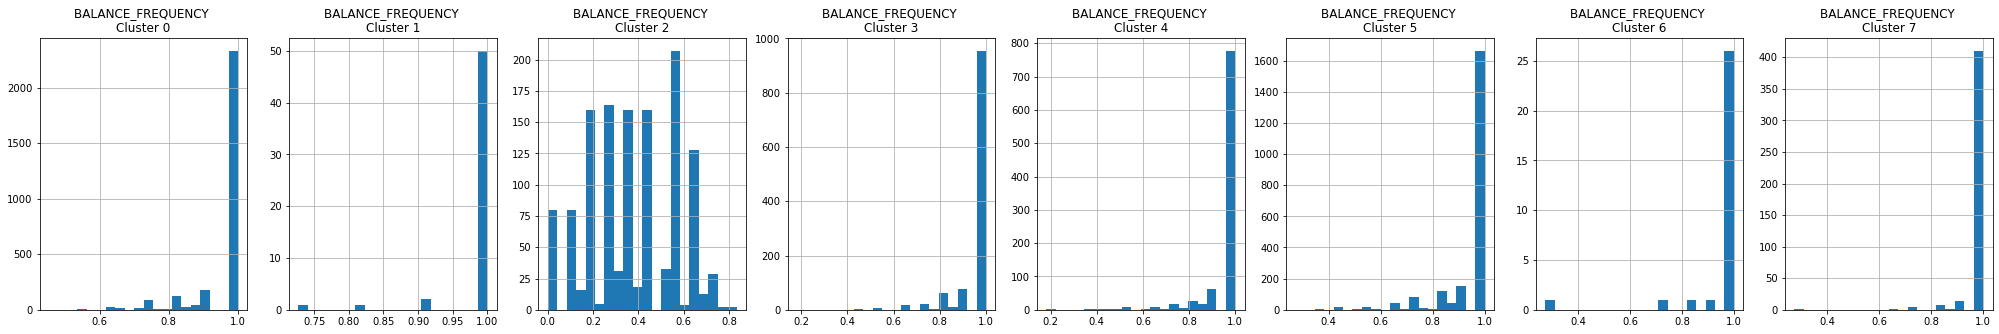

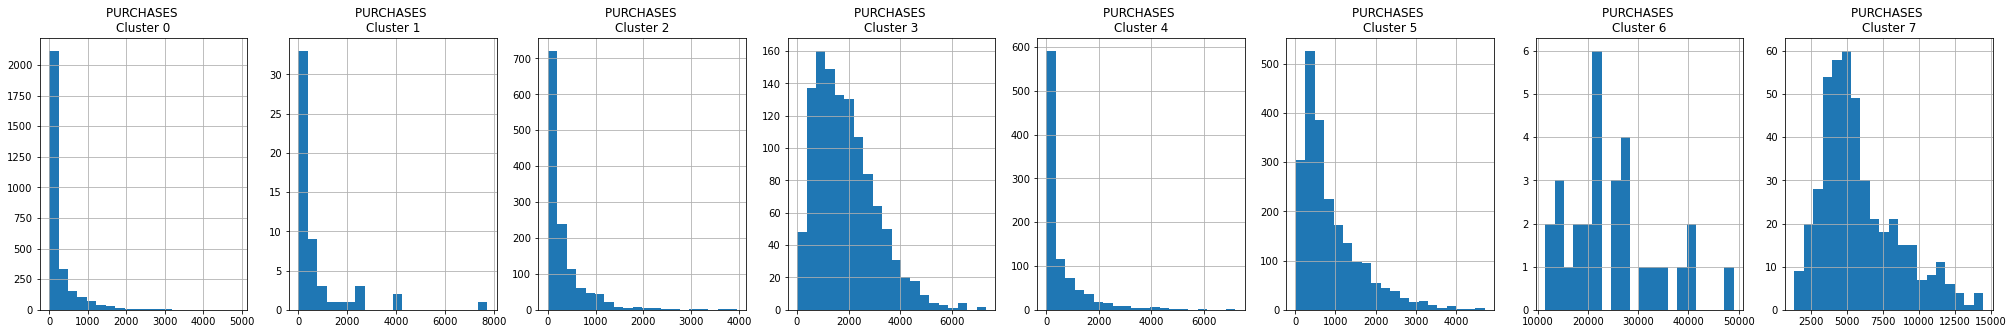

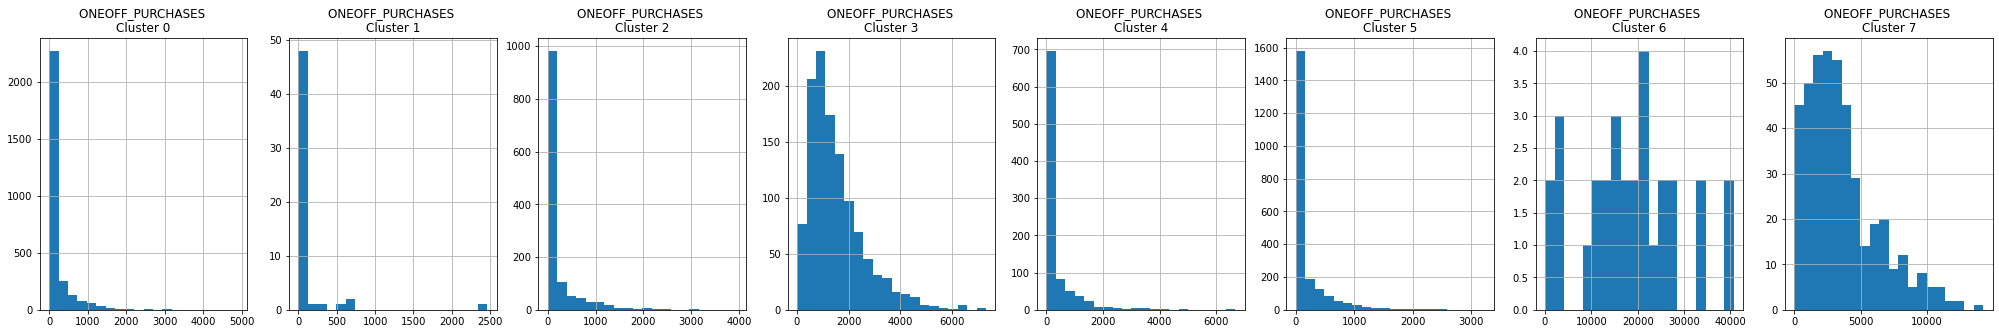

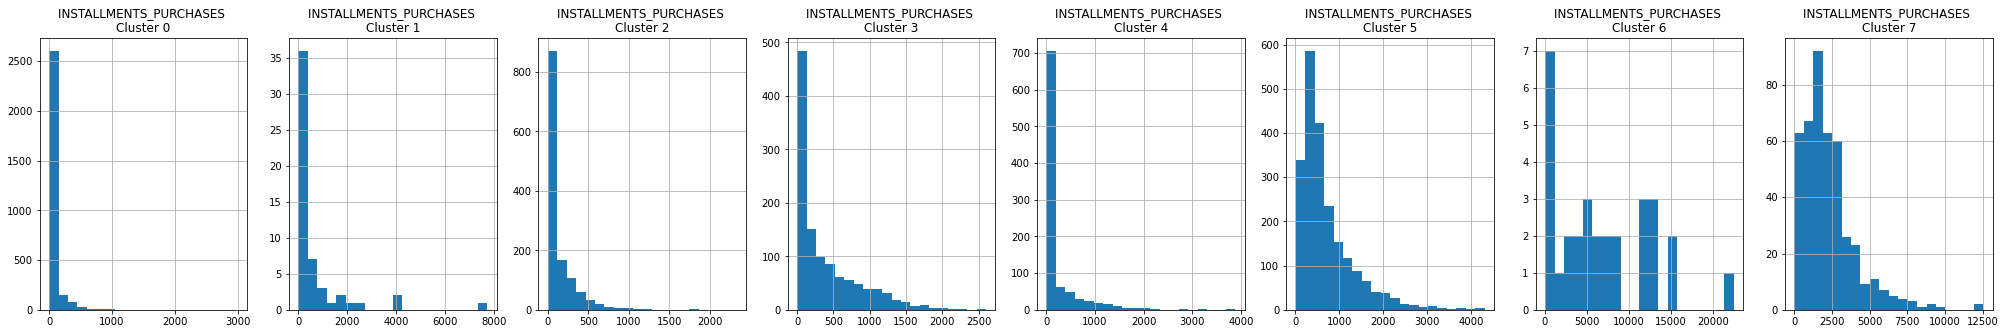

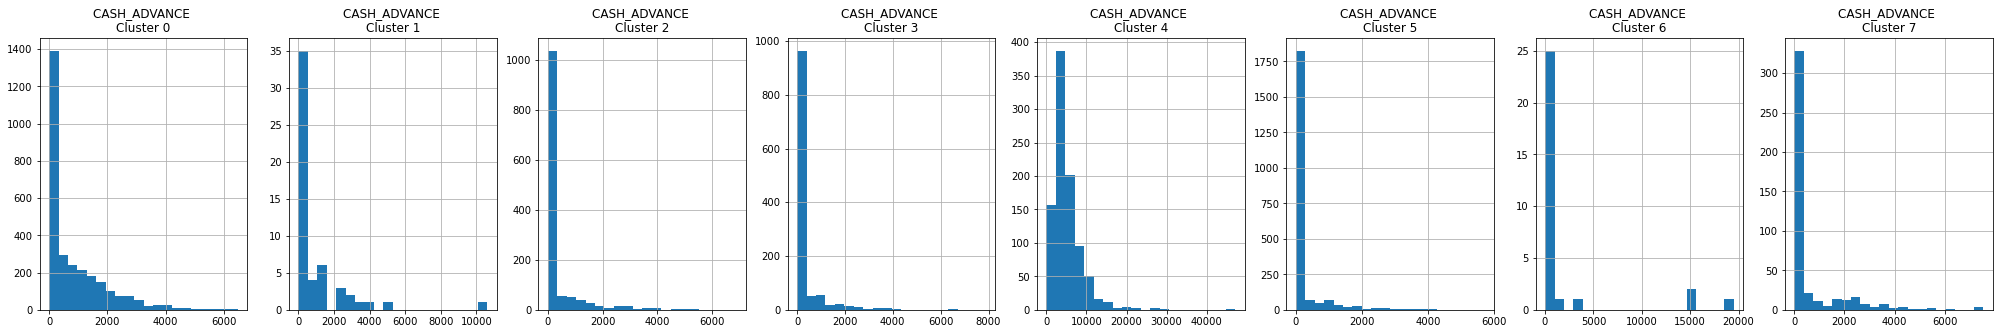

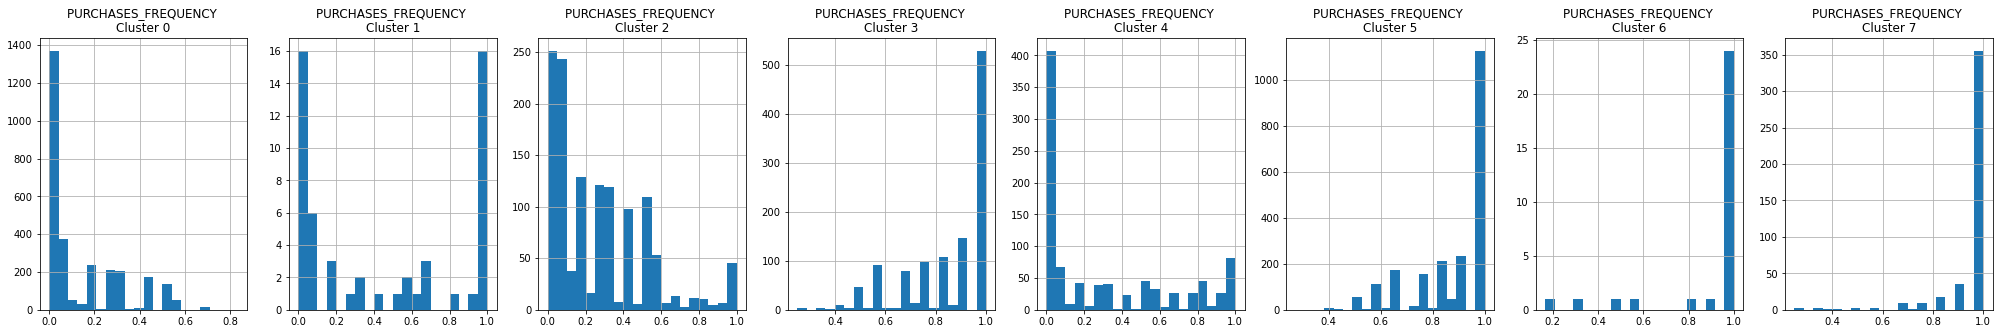

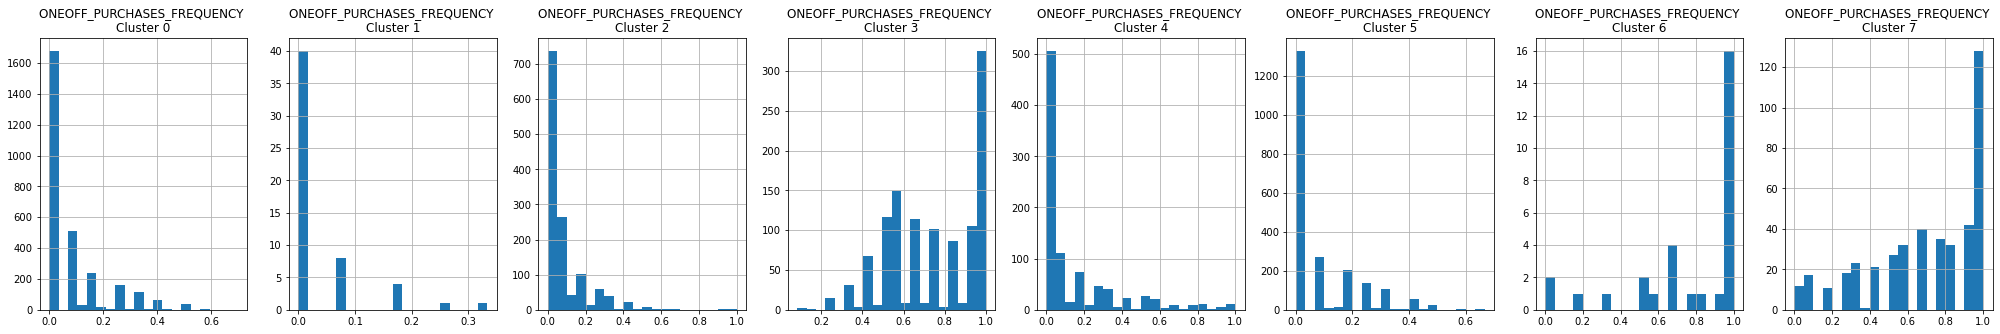

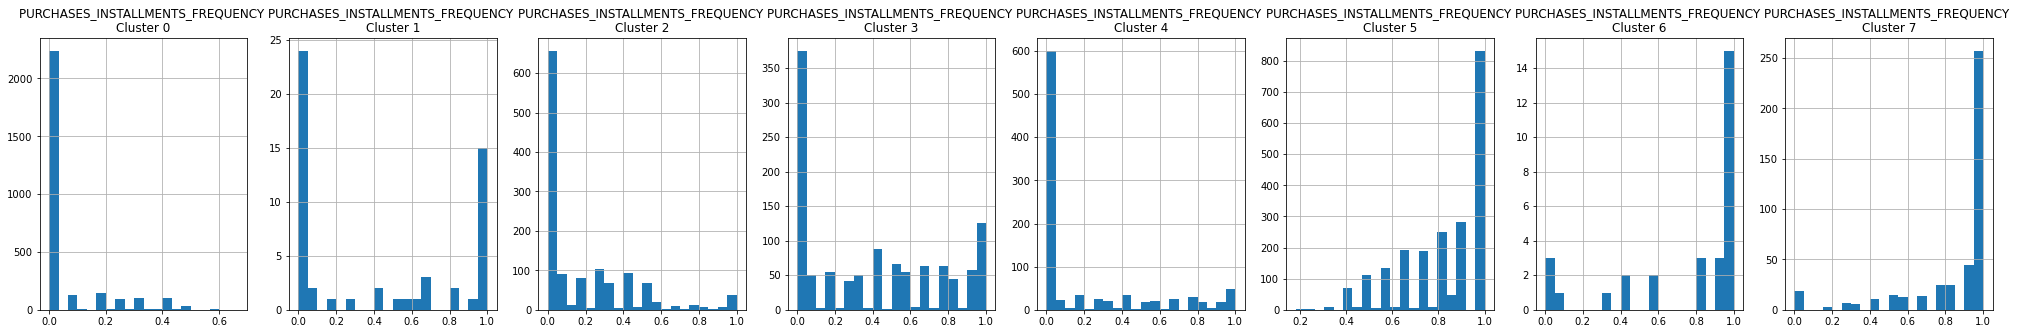

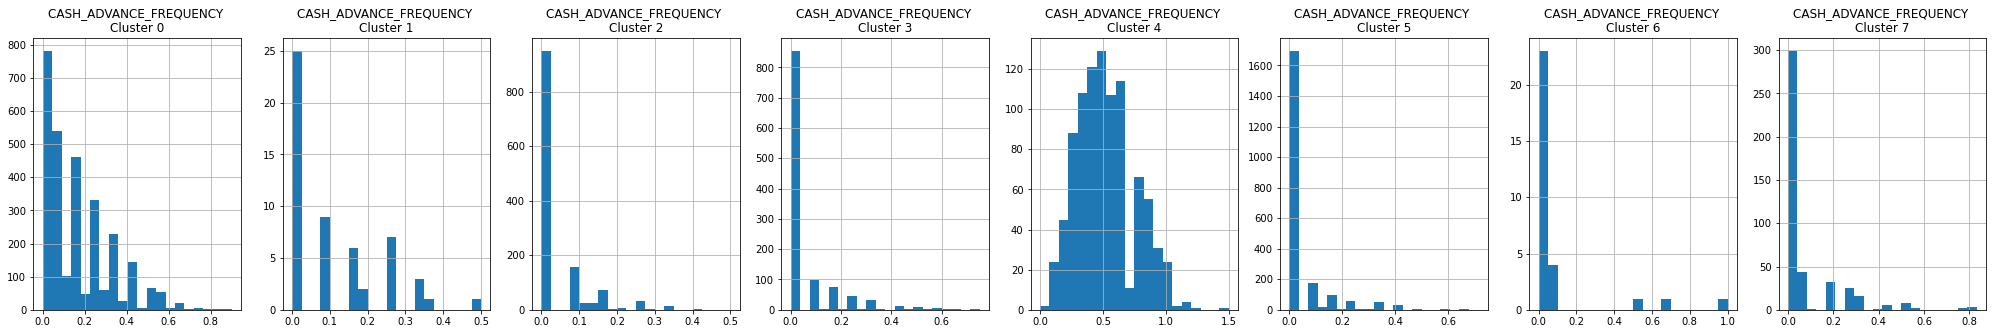

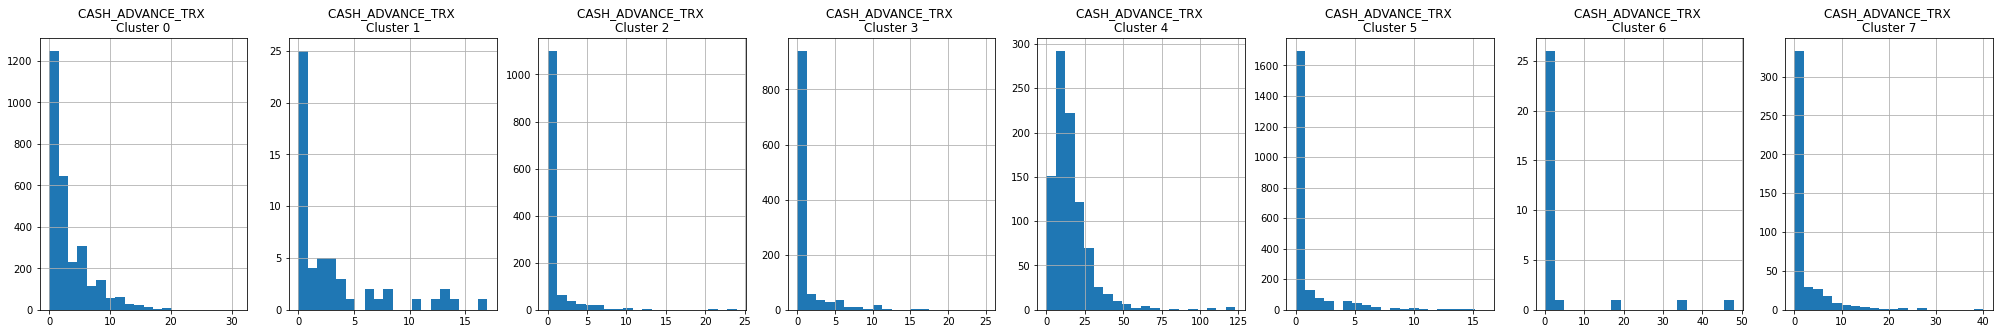

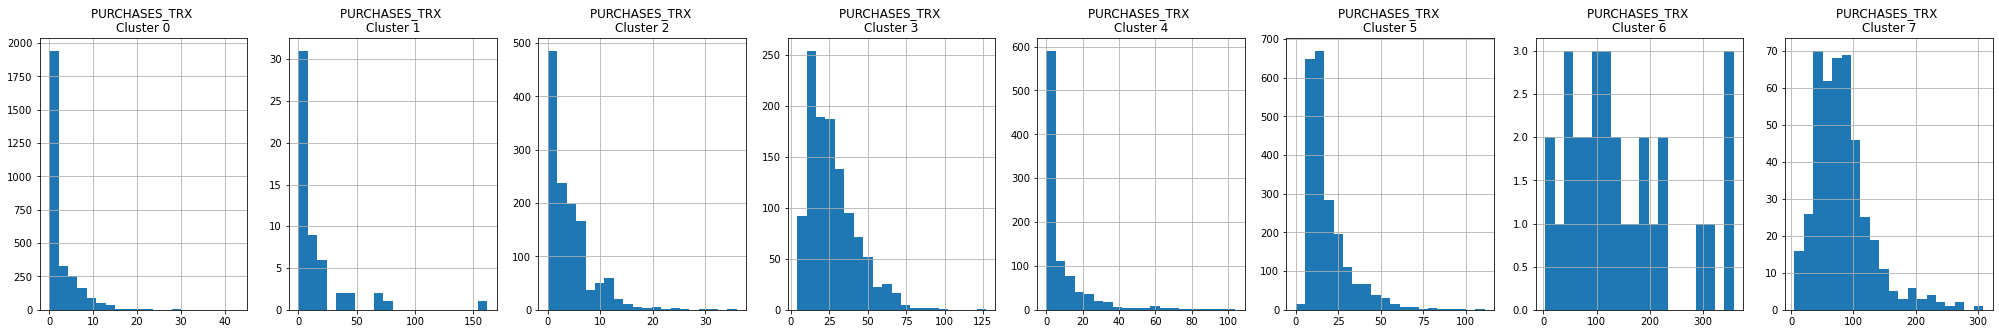

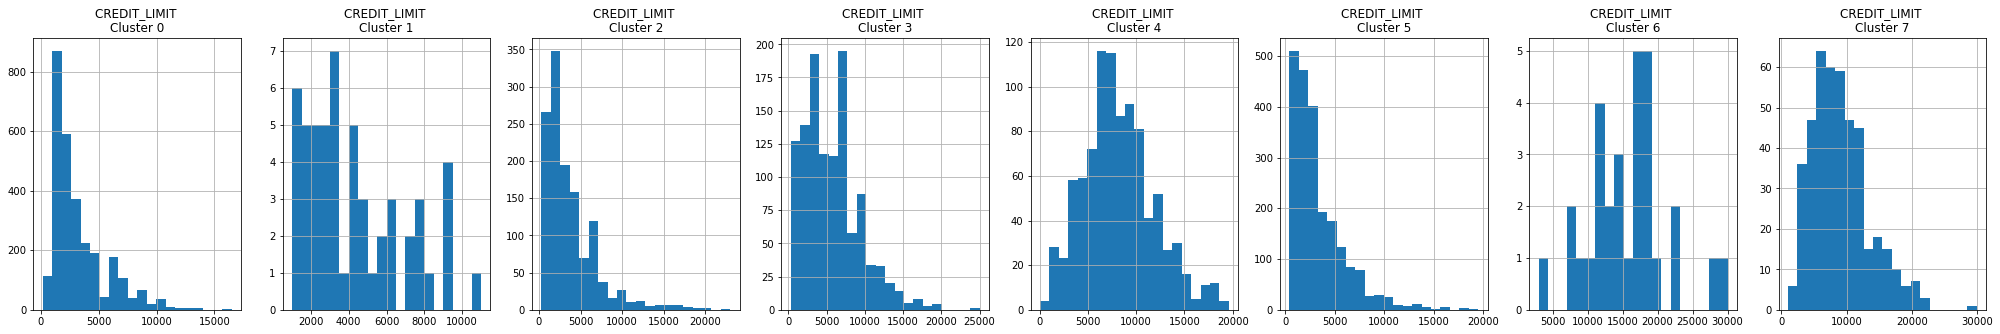

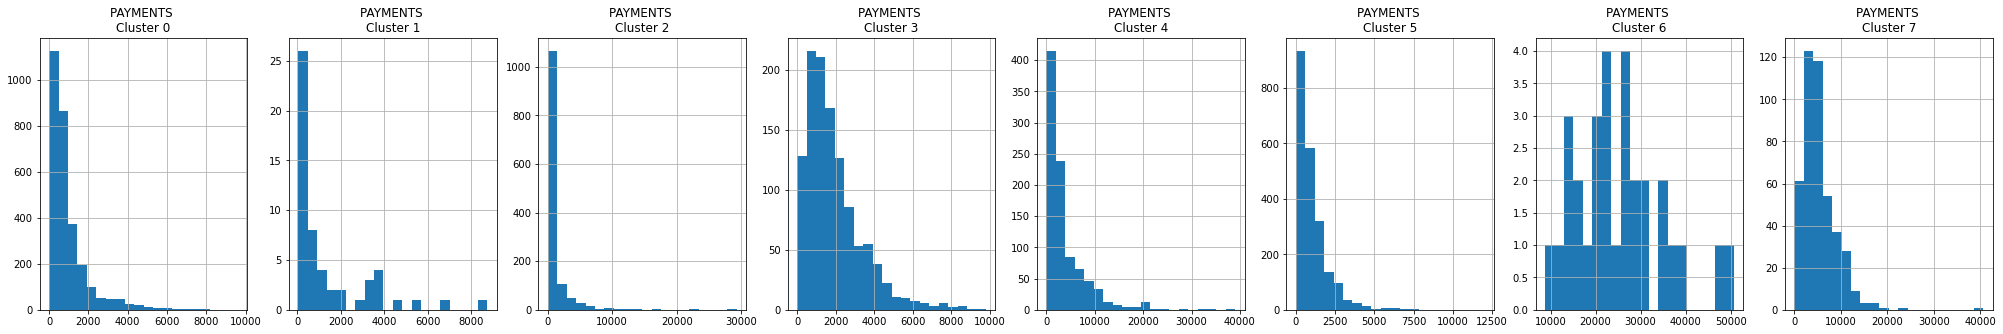

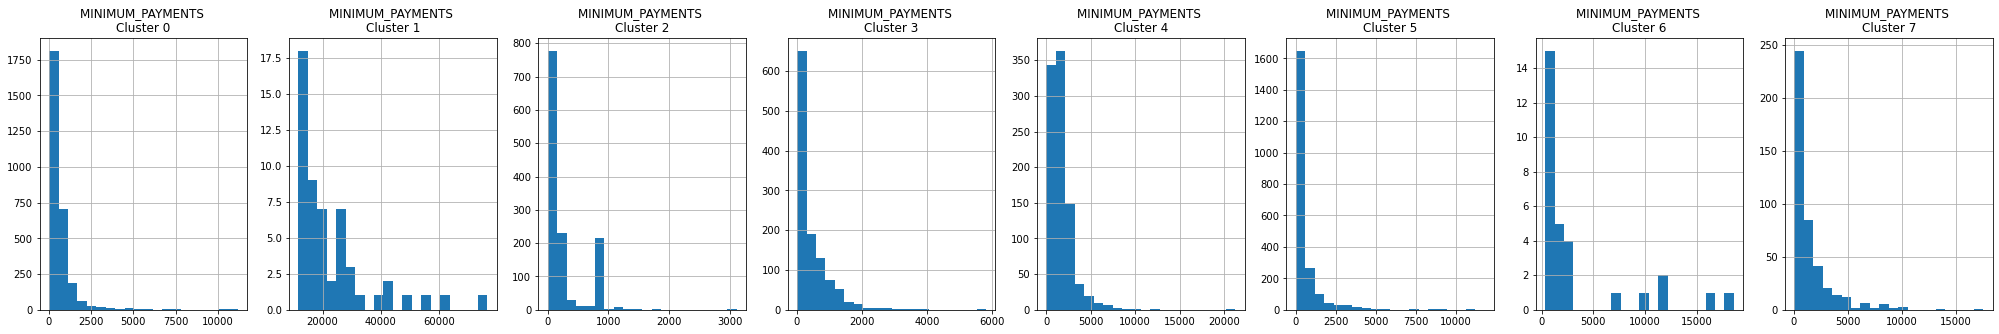

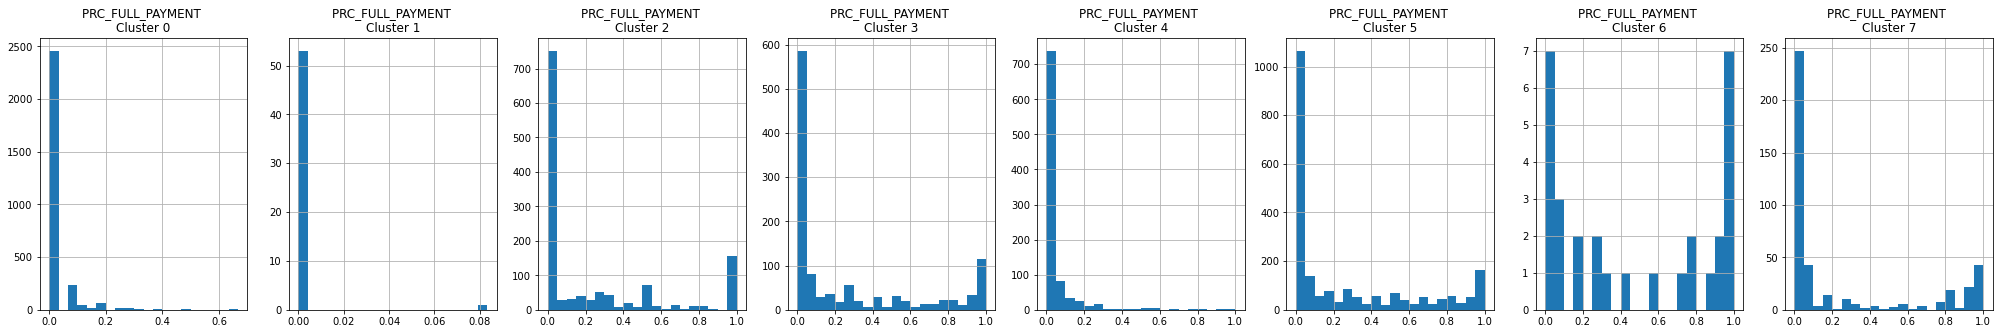

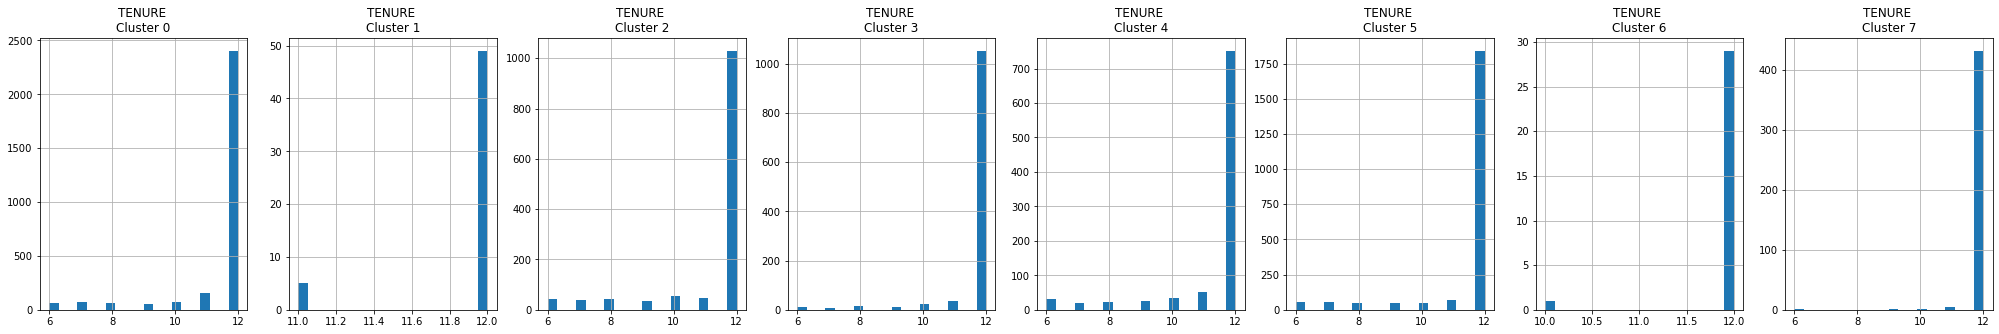

In [97]:
#Plot the histogram of various clusters

for i in cc_df.columns:
    plt.figure(figsize=(35,5))
    for j in range(8):
        plt.subplot(1,8,j+1)
        cluster=cc_df_cluster[cc_df_cluster['cluster']==j]
        cluster[i].hist(bins=20)
        plt.title('{} \nCluster {}'.format(i,j))
        
plt.show()

**APPLYING PCA AND VISUALIZING THE RESULTS**

In [117]:
# Obtain the principal components 
pca=PCA(n_components=2)
principal_comp=pca.fit_transform(cc_df_scaled)
principal_comp


array([[-1.68222024, -1.07645079],
       [-1.13829389,  2.50647358],
       [ 0.96968253, -0.38351435],
       ...,
       [-0.92620411, -1.81078431],
       [-2.33655164, -0.65796669],
       [-0.55642216, -0.40046685]])

In [118]:
# Create a dataframe with the two components
pca_df=pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])

In [119]:
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076451
1,-1.138294,2.506474
2,0.969683,-0.383514
3,-0.873627,0.043162
4,-1.599434,-0.688579


In [120]:
#concatinating the clusters labels to the dataframe

pca_df=pd.concat([pca_df,pd.DataFrame({'cluster':labels})],axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076451,0
1,-1.138294,2.506474,4
2,0.969683,-0.383514,3
3,-0.873627,0.043162,0
4,-1.599434,-0.688579,0


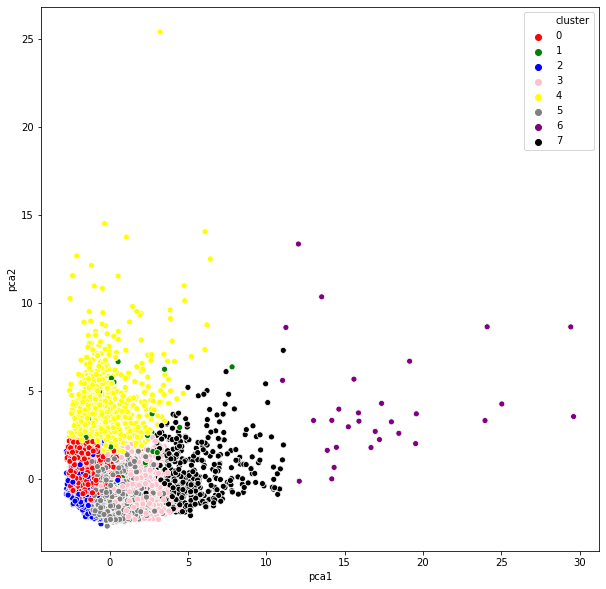

In [121]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

**APPLYING AUTOENCODERS(PERFORMNG DIMENSIONALITY REDUCTION USING AUTOENCODERS)**

In [123]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

In [128]:
input_df=Input(shape=(17,))
x=Dense(7,activation='relu')(input_df)
x=Dense(500,activation='relu',kernel_initializer='glorot_uniform')(x)
x=Dense(500,activation='relu',kernel_initializer='glorot_uniform')(x)
x=Dense(2000,activation='relu',kernel_initializer='glorot_uniform')(x)

encoded=Dense(10,activation='relu',kernel_initializer='glorot_uniform')(x)

x=Dense(2000,activation='relu',kernel_initializer='glorot_uniform')(encoded)
x=Dense(500,activation='relu',kernel_initializer='glorot_uniform')(x)

decoded=Dense(17,kernel_initializer='glorot_uniform')(x)


autoencoder=Model(input_df,decoded)


encoder=Model(input_df,encoded)

autoencoder.compile(optimizer='adam',loss='mean_squared_error')

In [129]:
cc_df_scaled.shape

(8950, 17)

In [130]:
autoencoder.fit(cc_df_scaled,cc_df_scaled,batch_size=128,epochs=25,verbose=1)

Epoch 1/25
8950/8950 [==============================] - 9s 980us/sample - loss: 0.6817
Epoch 2/25
8950/8950 [==============================] - 5s 523us/sample - loss: 0.3869
Epoch 3/25
8950/8950 [==============================] - 5s 583us/sample - loss: 0.3118
Epoch 4/25
8950/8950 [==============================] - 5s 564us/sample - loss: 0.2751
Epoch 5/25
8950/8950 [==============================] - 5s 563us/sample - loss: 0.2577
Epoch 6/25
8950/8950 [==============================] - 5s 553us/sample - loss: 0.2436
Epoch 7/25
8950/8950 [==============================] - 5s 579us/sample - loss: 0.2265
Epoch 8/25
8950/8950 [==============================] - ETA: 0s - loss: 0.212 - 5s 563us/sample - loss: 0.2119
Epoch 9/25
8950/8950 [==============================] - 5s 551us/sample - loss: 0.2043
Epoch 10/25
8950/8950 [==============================] - 5s 577us/sample - loss: 0.1928
Epoch 11/25
8950/8950 [==============================] - 5s 573us/sample - loss: 0.1901
Epoch 12/25
8950/

In [132]:
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense_16 (Dense)             (None, 7)                 126       
_________________________________________________________________
dense_17 (Dense)             (None, 500)               4000      
_________________________________________________________________
dense_18 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_19 (Dense)             (None, 2000)              1002000   
_________________________________________________________________
dense_20 (Dense)             (None, 10)                20010     
_________________________________________________________________
dense_21 (Dense)             (None, 2000)              2200

In [133]:
pred=encoder.predict(cc_df_scaled)

In [135]:
pred.shape

(8950, 10)

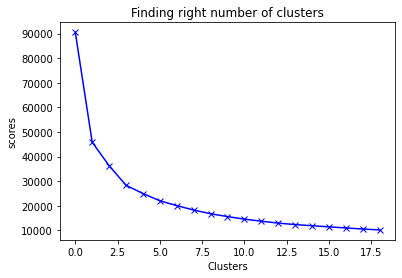

In [136]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans= KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

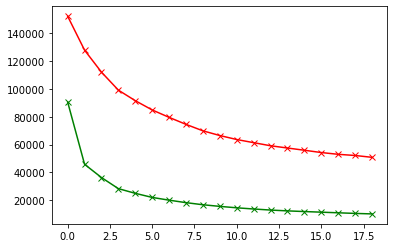

In [138]:
plt.plot(scores_1,'bx-',color='r')
plt.plot(scores_2,'bx-',color='g')

In [151]:
kmeans=KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_


In [152]:
df_cluster_dr = pd.concat([cc_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [153]:
pca=PCA(n_components=2)
prin_comp=pca.fit_transform(pred)
pca_df=pd.DataFrame(data=prin_comp,columns=['pca1','pca2'])

In [154]:
pca_df=pd.concat([pca_df,pd.DataFrame({'cluster':labels})],axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.060501,-0.142683,1
1,-2.166636,0.255512,1
2,-0.340113,1.248576,2
3,-0.466158,0.418608,2
4,-1.436330,0.160385,1


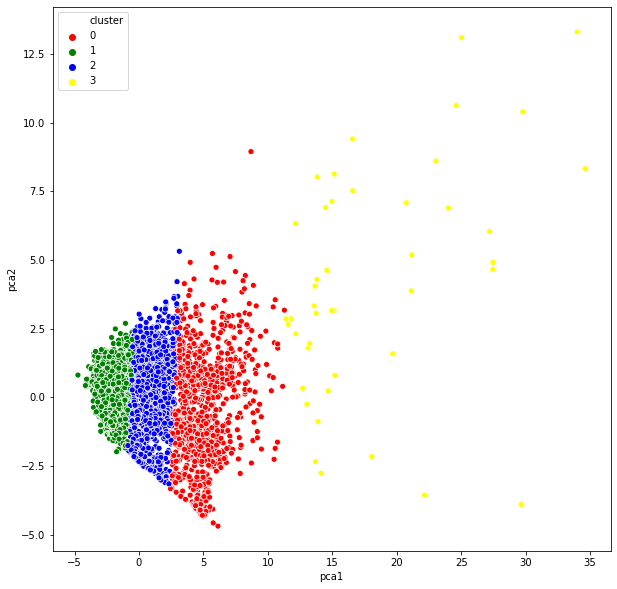

In [155]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()